# Workshop Part 1: Data processing
---
## Solutions notebook
---

## Contents of the notebook
- Crane datasets
    - Import the Crane datasets
    - Basis analysis of the Crane datasets
    - Visualize the Crane datasets
    - Export the Crane datasets to JSON
- GPSroute datasets
    - Import the GPS-route datasets
    - Basis analysis of the  GPS-route datasets
    - Visualize the GPS-route datasets
    - Export the GPS-route datasets to JSON

Assignments related to the Crane datasets:

1. Find the amount of transmissions related to the Crane: "Frida".
2. Find the names of the columns in the Crane dataset: "Frida".
3. Visualize the Flightpath of the Crane: "Frida", using MatplotLib and Cartopy.
4. Export the dataframe related to the Crane: "Frida" to the JSON file format.

Assignments related to the GPS Route datasets:

5. Find the amount of signals related to the GPS-route: "Zeeland_Car_1".
6. Find the names of the columns in the GPS-route dataset: "Zeeland_Car_1".
7. Visualize the GPS-Route: "Zeeland_Car_1", using MatplotLib en Cartopy.
8. Export the dataframe related to the GPS-route: "Zeeland_Car_1" to the JSON file format

#### NOTE 1: To run a cell, you have to select the cell and press the Run button at the top of the screen. <br>

#### NOTE 2: For convenience, you can type the first letter of a variable and press TAB to automatically add the variable 
    



### Importing the required modules.
---

In [1]:
import pandas as pd

import gpxpy

import matplotlib.pyplot as plt

import cartopy

import cartopy.crs as ccrs 

import cartopy.feature as cfeature 

# Crane datasets

---
### Importing the Crane Datasets


The Crane datasets come in the fileformat: "CSV" and can be found in the folder: '../../Datasets/CSV/'.
To read a datasets with the fileformat CSV, in a Pandas dataframe, we use the built-in Pandas function: "read_csv()".

As parameter we pass the file location of the CSV file we want to read. We do this for each Crane dataset in the folder: '../../Datasets/CSV/'. We assign the dataframe to a fitting variable. This variable represents the name of the Crane related to the dataset.

---

In [2]:
Agnetha = pd.read_csv('../../Datasets/CSV/20181003_Dataset_SV_GPS_Crane_9407_Crane_RRW-BuGBk_Agnetha.csv')
Frida = pd.read_csv('../../Datasets/CSV/20181003_Dataset_SV_GPS_Crane_9381_Crane_RRW-BuGBk_Frida.csv')
Cajsa = pd.read_csv('../../Datasets/CSV/20181003_Dataset_SV_GPS_Crane_9472_Crane_RRW-BuGR_Cajsa.csv')


---
### Basis analyses of the Crane datasets.

Below we are going to perform a basic analysis on each of the Crane datasets. After performing the analysis we can answer the following questions:
- How big is each dataset (How much transmissions)?
- How much columns does each dataset have?
- Which columns does each dataset have?
- What do these columns represent?

---
First we would like to know the amount of transmissions belonging to each Crane. The amount of transmissions is equal to the amount of datarows in the dataframes, representing the Cranes. 

To find out how much datarows a dataframe contains, we use the built-in Pandas function: ".shape" on the dataframe in question. This function prints the dimensionality of a dataframe. 

The dimensionality consists of:
- The amount of datarows, on index 0 (.shape[0])
- The amount of columns, on index 1 (.shape[1])

The line below prints the amount of tranmissions belonging to the Crane: "Agnetha".

In [3]:
Agnetha.shape[0]

44534

#### Assignment 1: Find the amount of transmissions related to the Crane: "Frida".

In [4]:
Frida.shape[0]

123805

The line below prints the amount of tranmissions belonging to the Crane: "Casja".

In [5]:
Cajsa.shape[0]

67887

---

Now we want to find out the amount of columns, their names and their datatypes of each Crane dataset. <br>
The line below prints the column names and their datatypes belonging to the Crane:"Agnetha" 

In [6]:
Agnetha.dtypes

event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         int64
gps:hdop                           float64
gps:vdop                           float64
ground-speed                       float64
heading                            float64
height-above-ellipsoid             float64
tag-tech-spec                      float64
tag-voltage                        float64
sensor-type                         object
individual-taxon-canonical-name     object
tag-local-identifier                 int64
individual-local-identifier          int64
study-name                          object
dtype: object

#### Assignment 2 : Find the names of the columns in the Crane dataset: "Frida".

In [7]:
Frida.dtypes #TODO

event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         int64
gps:hdop                           float64
gps:vdop                           float64
ground-speed                       float64
heading                            float64
height-above-ellipsoid             float64
tag-tech-spec                      float64
tag-voltage                        float64
sensor-type                         object
individual-taxon-canonical-name     object
tag-local-identifier                 int64
individual-local-identifier          int64
study-name                          object
dtype: object

The line below prints the column names and their datatypes belonging to the Crane: "Cajsa"

In [8]:
Cajsa.dtypes

event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         int64
gps:hdop                           float64
gps:vdop                           float64
ground-speed                       float64
heading                            float64
height-above-ellipsoid             float64
tag-tech-spec                      float64
tag-voltage                        float64
sensor-type                         object
individual-taxon-canonical-name     object
tag-local-identifier                 int64
individual-local-identifier          int64
study-name                          object
dtype: object

---

Now we want to create a simple visualization of the Crane Datasets.<br>
For this we are going to use the Python libraries MathPlotLib and Cartopy

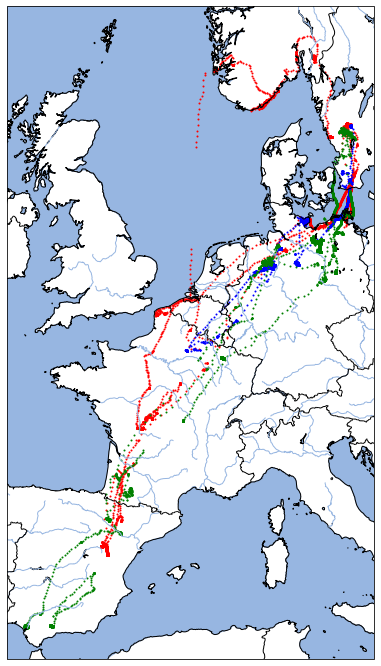

In [263]:
'''
Below we create a new plot using MathPlotLib. 
We pass the a size of the figure as parameter. 
'''

plt.figure(figsize = (20, 12))

'''
To create a Cartopy map we first need to create a new Mathplotlib in which we pass the projection of the Cartopy map as parameter.
The projection we are going to use is called: "Mercator".

For a list of all the available projections in cartopy you should visit the following URL:
https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

We use the syntax CRS to specify the type of projection we are going to use. CRS stands for: "Coordinate Reference System".
The type of CRS used in the Cartopy map defines the way the map will be shown. 

Another type of projection which can be used is the PlatteCarree projection. 
PlatteCarree uses equirectangular projection (North Latitude and East Longitude). 
For more info related to this type of projection you should visit the URL:
https://en.wikipedia.org/wiki/Equirectangular_projection

Here we assign the newly created instance of the plot to a variable called: "cartopyMapCranes".
As mentioned before; We are going to use the Mercator projection for this visualization.
'''
cartopyMapCranes = plt.axes(projection=ccrs.Mercator())

'''
Below we add the coastal lines to the cartopy map. We pass the resolution: "10m" as parameter. This value defines
the maximum deviation the coastal line can have. The higher the value, the higher the devation of the correct
location of the lines.
'''
cartopyMapCranes.coastlines(resolution='10m')

'''
Below we add the landsurface to the Cartopy map.
We give the landsurface (face) the color white. 
We give the edges of the landsurface (edge) te color black.
'''
cartopyMapCranes.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")
'''
Below we add the lakes to the cartopy map. 
We give the edges of the lake the color black.
'''
cartopyMapCranes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')

'''
Below we add the sea surface to the Cartopy Map
'''
cartopyMapCranes.add_feature(cfeature.OCEAN) 

'''
Below we add the rivers to the Cartopy Map
'''
cartopyMapCranes.add_feature(cfeature.RIVERS.with_scale('10m')) 

'''
Below we add the borders to the Cartopy Map
'''
cartopyMapCranes.add_feature(cfeature.BORDERS.with_scale('10m'))

'''
Now we want to create a dataplot which shows the flightpaths of the Cranes. We plot this data on the CartopyMap,
which we created above, using MathPlotLib. The plot we are going to create is called a scatter plot. This is one 
of the many types of MathPlotLib plots.  

For more information regarding the types of MathPlotLib plots, visit the following URL:
https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html

To plot a dataset we first have to declare on which instance of a CartopyMap we want to plot the data.
Next we have to declare the type of plot which we want to create.
Finally we need to pass values to the instance of the plot. These values are as follows:
1) The Longitude coordinates (The name of the column that contains this value).
2) The Latitude coordinates (The name of the column that contains this value).
3) The color which the datapoints are going to have.
4) This size which the datapoints are going to have (The radius).
5) The type of transformation which is required to plot the datapoints in the correct position of the map.

The line of code below is used to plot the Flightpath of the Crane:"Agnetha" on the CartopyMap.
The following applies to this line of code:
1) First we declare the instance of the cartopymap which is the variable: "cartopyMapCranes".
2) Next we want to declare the type of MathPlotLib plot that is going to be created, which is a scatter plot.
3) Next we want to declare the Dataframe and name of the column representing the Longitude Coordinates of the 
   Crane. The dataframe, containing the data of the Crane: "Agnetha", is called: "Agnetha". 
   The Longitude column is called: "location-long". 
4) Then we want to do the same for the Latitude Coordinates.
5) Next we want to declare the color of the datapoints, which is red in this case. 
6) We also want to set the size of the datapoints, which is 1 in this case.
7) Finally we want to add the transformation which is required for our datapoints to be displayed 
   in the correct location on the map. In our case we have to transform the datapoints in the PlatteCarree projection.
'''
cartopyMapCranes.scatter(Agnetha['location-long'], Agnetha['location-lat'],color="red", s=1, transform=ccrs.PlateCarree())

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                                                       #
#    ASSIGNMENT 3: Visualize the Flightpath of the Crane: "Frida" on the Cartopy Map    #
#                                                                                       #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
#TIP: Create a scatter plot just like we did with the other Cranes. Use the color Blue. 
#TODO
cartopyMapCranes.scatter(Frida['location-long'], Frida['location-lat'],color="blue", s=1, transform=ccrs.PlateCarree())

'''

The line of code below is used to plot the Flightpath of the Crane:"Cajsa" on the CartopyMap.
The following applies to this line of code:
1) First we declare the instance of the cartopymap which is the variable: "cartopyMapCranes".
2) Next we want to declare the type of MathPlotLib plot that is going to be created, which is a scatter plot.
3) Next we want to declare the Dataframe and name of the column representing the Longitude Coordinates of the 
   Crane. The dataframe, containing the data of the Crane: "Cajsa", is called: "Cajsa". 
   The Longitude column is called: "location-long". 
4) Then we want to do the same for the Latitude Coordinates.
5) Next we want to declare the color of the datapoints, which is green in this case. 
6) We also want to set the size of the datapoints, which is 1 in this case.
7) Finally we want to add the transformation which is required for our datapoints to be displayed 
   in the correct location on the map. In our case we have to transform the datapoints in the PlatteCarree projection.
'''
cartopyMapCranes.scatter(Cajsa['location-long'], Cajsa['location-lat'],color="green",s=1, transform=ccrs.PlateCarree())

---

## Other types of projections

At this point you shoud know how to plot data on a map using the Mercator projection. As mentioned before; there are a lot of other methods to do this. 
Each method has it's own advantages and disadvanteges. Below you will learn about some other methods which can be used to create a Cartopy Map using different Projections.

---

### Plotting Crane datapoints on a PlateCarree projection
When you want to have a simple visualization you can use the following method:<br>
Create a new plot with the PlateCarree projection. (Noted as: plt.axes(projection=PlateCarree()))<br>
Then use a scatter plot as: cartopyMapCranes.scatter(Frida['location-long'], Frida['location-lat'],color="red", s=1)<br>


#### NOTE: A disadvantage of this method is that the map is cylindrical in comparison to equirectangular above.

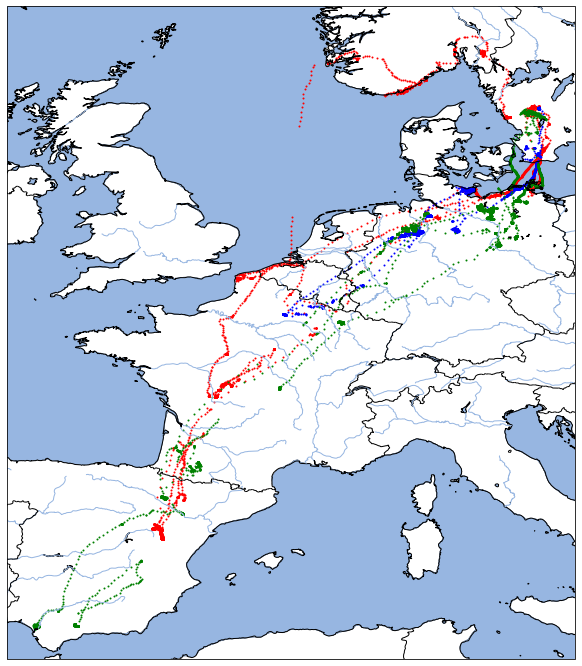

In [262]:
plt.figure(figsize = (20, 12))

# Use PlateCarree projection
cartopyMapCranes = plt.axes(projection=ccrs.PlateCarree())

# Add default features to Cartopy Map
cartopyMapCranes.coastlines(resolution='10m')
cartopyMapCranes.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor = "white")
cartopyMapCranes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
cartopyMapCranes.add_feature(cfeature.OCEAN) 
cartopyMapCranes.add_feature(cfeature.RIVERS.with_scale('10m')) 
cartopyMapCranes.add_feature(cfeature.BORDERS.with_scale('10m'))


# Add the scatter plots to the map without using any transformations
cartopyMapCranes.scatter(Agnetha['location-long'], Agnetha['location-lat'],color="red", s=1)
cartopyMapCranes.scatter(Frida['location-long'], Frida['location-lat'],color="blue", s=1)
cartopyMapCranes.scatter(Cajsa['location-long'], Cajsa['location-lat'],color="green",s=1)

---

### Best way to plot datapoints on Mercator Projection
When wanting to use a Mercator projection you can use the following method:<br>
Create a new plot with the Mercator projection. (Noted as: plt.axes(projection=Mercator()))<br>
Then use a scatter plot. Noted as : cartopyMapCranes.scatter(Frida['location-long'], Frida['location-lat'],color="red", s=1, transform=ccrs.PlateCarree())<br>
Make sure to add the syntax "transform = ccrs.PlateCarreee()" which ensures that the datapoints are plotted in the correct location on the Mercator projection plot.

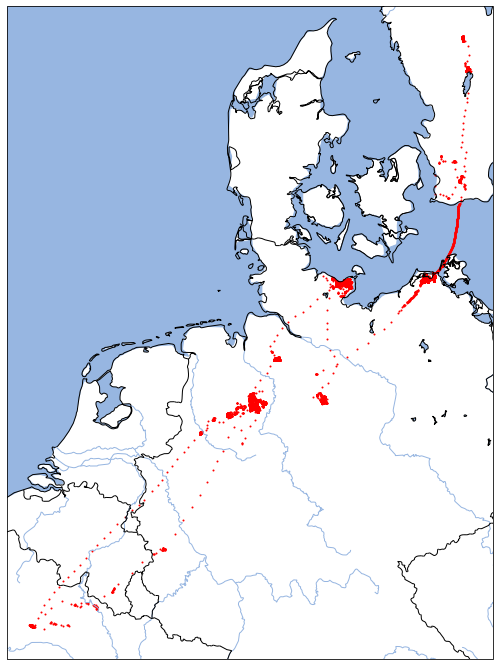

In [261]:
plt.figure(figsize = (20, 12))

# Use Mercator projection
cartopyMapCranes = plt.axes(projection=ccrs.Mercator())

# Add default features to Cartopy Map
cartopyMapCranes.coastlines(resolution='10m')
cartopyMapCranes.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")
cartopyMapCranes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
cartopyMapCranes.add_feature(cfeature.RIVERS.with_scale('10m')) 
cartopyMapCranes.add_feature(cfeature.BORDERS.with_scale('10m'))
cartopyMapCranes.add_feature(cfeature.OCEAN.with_scale('50m')) 

# Plot the datapoints using a scatter plot and transforming the projection of the datapoints to PlateCarree.
cartopyMapCranes.scatter(Frida['location-long'], Frida['location-lat'],color="red",s=1, transform=ccrs.PlateCarree())

---

### Less used option to plot datapoints on Mercator Projection

Another (less used) option to plot datapoints on a Mercator projection is as follows: <br>
Create a new plot with the Mercator projection. (Noted as: plt.axes(projection=Mercator()))<br>

#### Plot POINTS using plot:

To create data points (instead of lines) we create a new data plot using "cartopyMapCranes.plot()" instead of "cartopyMapCranes.scatter()". (Noted as: cartopyMapCranes.plot(Frida['location-long'], Frida['location-lat'],'bo',transform=ccrs.PlateCarree()))<br>
The above example will create blue datapoints on the map. This is done by adding the : "bo" paramater. The first letter determins what color the datapoints are going to have.<br>

#### Plot LINES using plot:

To plot data lines you can use the following syntax: "cartopyMapCranes.plot(Frida['location-long'], Frida['location-lat'],color="blue", transform=ccrs.PlateCarree())"<br>
Make sure to add the syntax "transform = ccrs.Geodetic()" which makes sure the datapoints are plotted in the correct location on the Mercator projection plot.

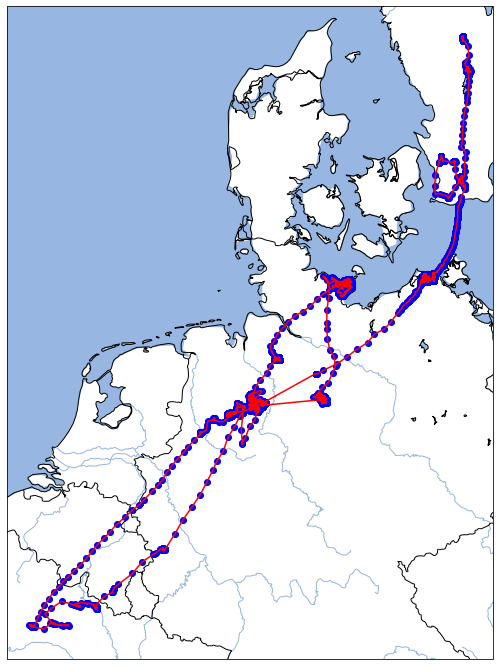

In [267]:
plt.figure(figsize = (20, 12))

# Use Mercator projection
cartopyMapCranes = plt.axes(projection=ccrs.Mercator())
cartopyMapCranes.coastlines(resolution='10m') 
cartopyMapCranes.add_feature(cfeature.LAND, edgecolor='black', facecolor = "white")
cartopyMapCranes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black') 
cartopyMapCranes.add_feature(cfeature.RIVERS.with_scale('10m')) 
cartopyMapCranes.add_feature(cfeature.BORDERS.with_scale('10m'))
cartopyMapCranes.add_feature(cfeature.OCEAN.with_scale('50m')) 

# Plot datapoints
cartopyMapCranes.plot(Frida['location-long'], Frida['location-lat'],'bo',transform=ccrs.PlateCarree())

# Plot a line
cartopyMapCranes.plot(Frida['location-long'], Frida['location-lat'],color="red", transform=ccrs.PlateCarree())

---
Now that we know what the Flightpaths of the Cranes look like, we want to export the Dataframe to the JSON 
file format. 

To export a dataframe to JSON, we use the built-in Pandas function: "to_json()" on the dataframe.<br>
First you need to declare the dataframe that you want to export to JSON. <br>
Then you call the function: ".to_json()" on the dataframe.<br>

In this function we need to pass the location on which we want to save the JSON file and the orientation in which
the records need to be written to the file. 
 <br>

---
The line below exports the dataframe of the Crane: "Agnetha" to the file format JSON. <br>
The dataframe on which we are going to call the function: ".to_json()".<br>
De values wich we are going to pass in this function are as follows: 
- The file location in which we are going to save the file is: ../../Datasets/JSON/
- The name of the file is going to be: Crane-Agnetha.json
- The orientation in which the records are going to written to the file is: records (which makes the data human readable)

In [14]:
Agnetha.to_json('../../Datasets/JSON/Crane-Agnetha.json',orient = 'records')

#### Assignment 4: Export the dataframe related to the Crane: "Frida" to the JSON file format.

In [15]:
Frida.to_json('../../Datasets/JSON/Crane-Frida.json',orient = 'records') #TODO

---
The line below exports the dataframe of the Crane: "Cajsa" to the file format JSON. <br>
The dataframe on which we are going to call the function: ".to_json()".<br>
De values wich we are going to pass in this function are as follows: 
- The file location in which we are going to save the file is: ../../Datasets/JSON/
- The name of the file is going to be: Crane-Cajsa.json
- The orientation in which the records are going to written to the file is: records (which makes the data human readable)

In [16]:
Cajsa.to_json('../../Datasets/JSON/Crane-Cajsa.json',orient = 'records')

---

---

## End Assignment 1 to 4

---

---

---
# GPS-route datasets

---
### Below a Generic function is defined to read GPX files in a dataframe. 
#### NOTE: The way this is done is described in the complete GeoStack Course. 
---

In [13]:
def create_dataframe(df):
    data = df.tracks[0].segments[0].points
    df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])

    for point in data:
        df = df.append({'lon' : point.longitude,
                        'lat' : point.latitude, 
                        'alt' : point.elevation,
                        'time': point.time}, ignore_index=True)
    return df

---
### Importing the GPS-route datasets

The GPS-route datasets come in the file format GPX and can be found in the folder: '../../Datasets/GPX/'. 
To read a GPX dataset in a Pandas dataframe, the Python library: "gpxpy" is used. This library is created for the processing of GPX data. For more info related to gpxpy, visit the URL: <br>

https://github.com/tkrajina/gpxpy

To read the GPX dataset we us the syntax: gpxpy.parse(). As parameter we pass the file location of the GPX file we want to read. We do this for each GPX dataset and assign the result to a fitting variable. 

---

In [14]:
Biesbosch = create_dataframe(gpxpy.parse(open('../../Datasets/GPX/Biesbosch.gpx', 'r')))
Zeeland_Car_1 = create_dataframe(gpxpy.parse(open('../../Datasets/GPX/Zeeland_Car_1.gpx', 'r')))
Zeeland_Car_2 = create_dataframe(gpxpy.parse(open('../../Datasets/GPX/Zeeland_Car_2.gpx', 'r')))


---
### Basic analysis of the GPS-route datasets

Below we perform a basic analysis on the GPS-route datasets. 



Below we are going to perform a basic analysis on each of the Crane datasets. After performing the analysis we can answer the following questions:
- How big is each dataset (How much Signals in each Route)?
- How much columns does each dataset have?
- Which columns does each dataset have?
- What do these columns represent?

In part 2 of the workshop, we are going to create data models using the answers to this question.

---
The line below prints the amount of Signals belonging to the GPS-Route: "Biesbosch". As mentioned above, we call the function: ".shape" on the dataframe representing the Biesbosch route. 

In [15]:
Biesbosch.shape[0]

124

#### Assignment 5 : Find the amount of signals related to the GPS-route: "Zeeland_Car_1"

In [16]:
Zeeland_Car_1.shape[0]#TODO

1799

The line below prints the amount of Signals belonging to the GPS-Route: "Zeeland_Car_2". As mentioned above, we call the function: ".shape" on the dataframe representing the Zeeland Car 2 route. 

In [17]:
Zeeland_Car_2.shape[0]

849

---
Now we want to find out the amount of columns, their names and their datatypes of each GPS-Route. <br>

---
The line below prints the column names and their datatypes belonging to the Route:"Biesbosch" 

In [18]:
Biesbosch.dtypes

lon     float64
lat     float64
alt     float64
time     object
dtype: object

#### Assignment 6 : Find the names of the columns in the GPS-route dataset: "Zeeland_Car_1".

In [19]:
Zeeland_Car_1.dtypes#TODO

lon     float64
lat     float64
alt     float64
time     object
dtype: object

The line below prints the column names and their datatypes belonging to the Route:"Zeeland_Car_2"

In [20]:
Zeeland_Car_2.dtypes

lon     float64
lat     float64
alt     float64
time     object
dtype: object

---
Now we want to create a simple visualization of the GPS-Route Datasets.<br>
For this we are going to use the Python libraries MathPlotLib and Cartopy

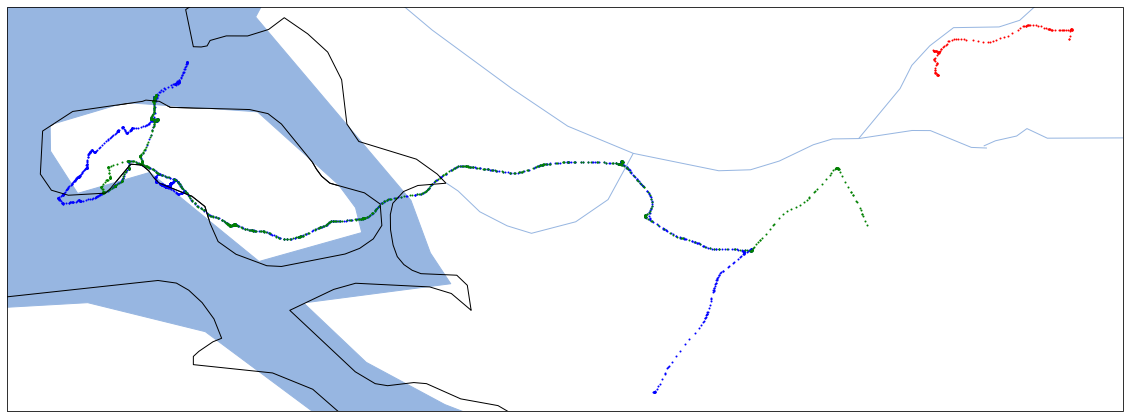

In [250]:
'''
First we create a new Cartopy map called:"cartopyMapRoutes".
In case you forgot what the code below does, you can always go back to assigment 3.
'''
plt.figure(figsize = (20, 10))

cartopyMapRoutes = plt.axes(projection=ccrs.Mercator())
cartopyMapRoutes.coastlines(resolution='10m')
cartopyMapRoutes.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor = "white")
cartopyMapRoutes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
cartopyMapRoutes.add_feature(cfeature.RIVERS.with_scale('10m')) 
cartopyMapRoutes.add_feature(cfeature.BORDERS.with_scale('10m'))

cartopyMapRoutes.add_feature(cfeature.OCEAN.with_scale('50m')) 
'''
Now we want to plot the GPS-Routes on the new Cartopy Map.
Just like with the Crane Flightpaths, we are going to create scatter plots and add them to the CartopyMap called:
"cartopyMapRoutes".

The line below adds the GPS-Route:"Biesbosch" to the Cartopy Map. 
The following applies to this line of code:
1) First we declare the instance of the cartopymap which is the variable: "cartopyMapRoutes".
2) Next we want to declare the type of MathPlotLib plot that is going to be created, which is a scatter plot.
3) Next we want to declare the Dataframe and name of the column representing the Longitude Coordinates of the 
   GPS-Route. The dataframe, containing the data of the route: "Biesbosch", is called: "Biesbosch". 
   The Longitude column is called: "lon". 
4) Then we want to do the same for the Latitude Coordinates.
5) Next we want to declare the color of the datapoints, which is red in this case. 
6) We also want to set the size of the datapoints, which is 1 in this case.
7) Finally we want to add the transformation which is required for our datapoints to be displayed 
   in the correct location on the map. In our case we have to transform the datapoints in the PlatteCarree projection.
'''
cartopyMapRoutes.scatter(Biesbosch['lon'],Biesbosch['lat'],color="red", s =1, transform=ccrs.PlateCarree())


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                                                       #
#    ASSIGNMENT 7: Visualize the GPS-Route: "Zeeland_Car_1" on the Cartopy Map.         #
#                                                                                       #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

#TIP: Create a scatter plot just like we did with the other Routes. Use the color Blue. 
#TODO
cartopyMapRoutes.scatter(Zeeland_Car_1['lon'],Zeeland_Car_1['lat'],color="blue",s=1, transform=ccrs.PlateCarree())

'''
The line below adds the GPS-Route:"Biesbosch" to the Cartopy Map. 
The following applies to this line of code:
1) First we declare the instance of the cartopymap which is the variable: "cartopyMapRoutes".
2) Next we want to declare the type of MathPlotLib plot that is going to be created, which is a scatter plot.
3) Next we want to declare the Dataframe and name of the column representing the Longitude Coordinates of the 
   GPS-Route. The dataframe, containing the data of the route: "Zeeland_Car_2", is called: "Zeeland_Car_2". 
   The Longitude column is called: "lon". 
4) Then we want to do the same for the Latitude Coordinates.
5) Next we want to declare the color of the datapoints, which is green in this case. 
6) We also want to set the size of the datapoints, which is 1 in this case.
7) Finally we want to add the transformation which is required for our datapoints to be displayed 
   in the correct location on the map. In our case we have to transform the datapoints in the PlatteCarree projection.
'''
cartopyMapRoutes.scatter(Zeeland_Car_2['lon'],Zeeland_Car_2['lat'],color="green", s=1 ,transform=ccrs.PlateCarree())

---

### Plotting Crane datapoints on a PlateCarree projection
When you want to have a simple visualization you can use the following method:<br>
Create a new plot with the PlateCarree projection. (Noted as: plt.axes(projection=PlateCarree()))<br>
Then use a scatter plot as: cartopyMapCranes.scatter(Frida['location-long'], Frida['location-lat'],color="red", s=1)<br>


#### NOTE: A disadvantage of this method is that the map is cylindrical in comparison to equirectangular above.

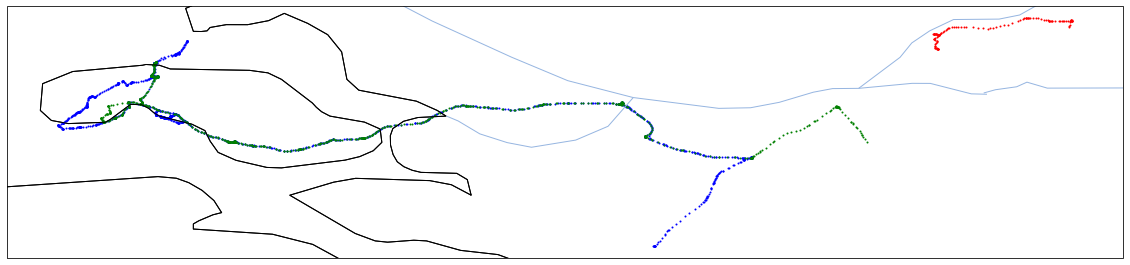

In [204]:
plt.figure(figsize = (20, 10))

# Set the projection to PlateCarree
cartopyMapRoutes = plt.axes(projection=ccrs.PlateCarree())
cartopyMapRoutes.coastlines(resolution='10m')
cartopyMapRoutes.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor = "white")
cartopyMapRoutes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')
cartopyMapRoutes.add_feature(cfeature.RIVERS.with_scale('10m')) 
cartopyMapRoutes.add_feature(cfeature.BORDERS.with_scale('10m'))


# Add the datasets as scatter plot's on the cartopyMapRoutes map. 
cartopyMapRoutes.scatter(Biesbosch['lon'],Biesbosch['lat'],color="red", s =1)

cartopyMapRoutes.scatter(Zeeland_Car_1['lon'],Zeeland_Car_1['lat'],color="blue",s=1)

cartopyMapRoutes.scatter(Zeeland_Car_2['lon'],Zeeland_Car_2['lat'],color="green", s=1)

---
Now that we know what the Routes of the GPS-Routes look like, we want to export the Dataframes to the JSON 
file format. 

As mentioned above:

To export a dataframe to JSON, we use the built-in Pandas function: "to_json()" on the dataframe.<br>
First you need to declare the dataframe that you want to export to JSON. <br>
Then you call the function: ".to_json()" on the dataframe.<br>

In this function we need to pass the location on which we want to save the JSON file and the orientation in which
the records need to be written to the file. 
 <br>
 
 ---
The line below exports the dataframe of the GPS-Route: "Biesbosch" to the file format JSON. <br>
The dataframe on which we are going to call the function: ".to_json()".<br>
De values wich we are going to pass in this function are as follows: 
- The file location in which we are going to save the file is: ../../Datasets/JSON/
- The name of the file is going to be: Route-Biesbosch.json
- The orientation in which the records are going to written to the file is: records (which makes the data human readable)

In [26]:
Biesbosch.to_json('../../Datasets/JSON/Route-Biesbosch.json',orient = 'records')

#### Assignment 8 : Export the dataframe related to the GPS-route: "Zeeland_Car_1" to the JSON file format

In [27]:
Zeeland_Car_1.to_json('../../Datasets/JSON/Route-Zeeland_Car_1.json',orient = 'records')#TODO

The line below exports the dataframe of the GPS-Route: "Zeeland Car 2" to the file format JSON. <br>
The dataframe on which we are going to call the function: ".to_json()".<br>
De values wich we are going to pass in this function are as follows: 
- The file location in which we are going to save the file is: ../../Datasets/JSON/
- The name of the file is going to be: Route-Zeeland_Car_2.json
- The orientation in which the records are going to written to the file is: records (which makes the data human readable)

In [28]:
Zeeland_Car_2.to_json('../../Datasets/JSON/Route-Zeeland_Car_2.json',orient = 'records')